<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/tensorflow/tf_lr_schedules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -q tensorflow-gpu==1.15.0 tensorflow==1.15.0

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [3]:
print(tf.__version__)

1.15.2


In [4]:
N = 400
def plot_lr_schedule(lr_schedule):
    y = []
    x = range(0, N+1, 10)
    with tf.Session() as sess:
        for global_step in x:
            lr = lr_schedule(global_step).eval()
            y.append(lr)
            # print(f'[{global_step},{lr:.4f}]', end=',')

    plt.figure(figsize=(8,6))
    plt.plot(x, y, 'r-')
    plt.ylim([0,max(plt.ylim())])
    plt.xlabel('Step')
    plt.ylabel('Learning Rate')
    plt.title('ExponentialDecay')
    plt.show()

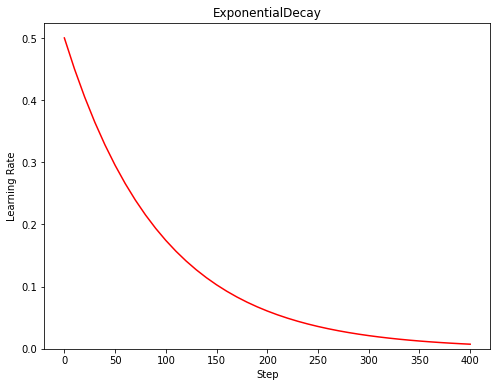

In [5]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.5, decay_steps=10, decay_rate=0.9, staircase=False)
plot_lr_schedule(lr_schedule)

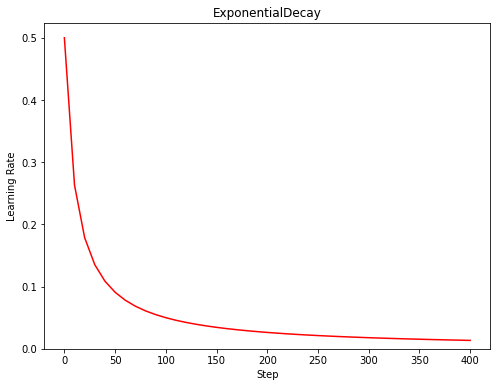

In [6]:
lr_schedule =  tf.keras.optimizers.schedules.InverseTimeDecay(
    0.5, 10, 0.9, staircase=False, name=None
)
plot_lr_schedule(lr_schedule)

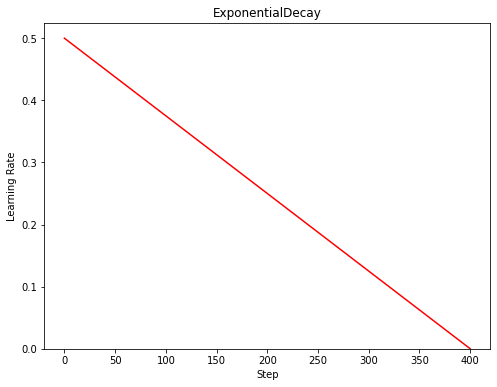

In [7]:
lr_schedule =  tf.keras.optimizers.schedules.PolynomialDecay(
    0.5, N, end_learning_rate=0.0001, power=1.0,
    cycle=False, name=None
)
plot_lr_schedule(lr_schedule)

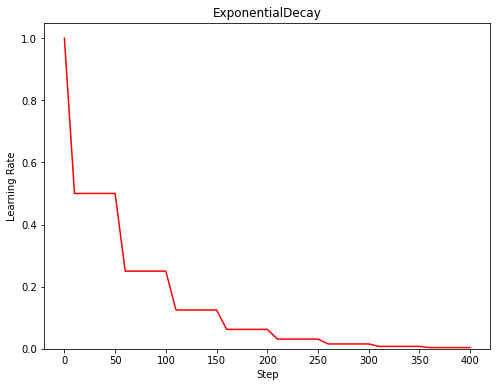

In [8]:
step = 50
boundaries = range(0, N, step) 
values = range(0, N+step, step)
values = [0.5 ** (x/step) for x in values]

lr_schedule =  tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values, name=None
)
plot_lr_schedule(lr_schedule)